## Importer les bibliothèques

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Importer les données

In [7]:
datacrimes = pd.read_csv('crimes.csv', sep = ';')
datacrimes.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


## Dimension et Description

In [5]:
datacrimes.shape

(50, 8)

In [6]:
datacrimes.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


## Définitions de X et des labels

In [8]:
X = datacrimes.iloc[:,1:8].values
labels = datacrimes.iloc[:,0].values
labels

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New-Hampshire', 'New-Jersey', 'New-Mexico',
       'New-York', 'North-Carolina ', 'North-Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode-Island', 'South-Carolina ',
       'South-Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West-Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

## ACP et Standarisation

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
pca = PCA()
pca.fit(StandardScaler().fit_transform(X))
print(pca.components_[:2,:])
#pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_[:2])

[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]]


0.764811620190864

## Visualisation

In [25]:
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

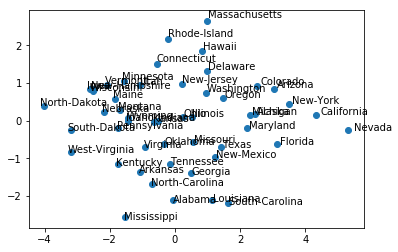

In [40]:
plt.scatter(X_pca[:,0], X_pca[:,1])
for label,x,y in zip(labels,X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y), textcoords='offset points')
plt.show()

## Clustering par KMeans

In [2]:
from sklearn.cluster import KMeans
import matplotlib.colors as col

In [13]:
from sklearn import metrics
for i in range(2,6):
    y_pred = KMeans(n_clusters=i).fit_predict(X)
    print('L indice de silhouette pour {0:d} clusters est {1: f}'.format(i,metrics.silhouette_score(X,y_pred,metric='euclidean')))

L indice de silhouette pour 2 clusters est 0.470582
L indice de silhouette pour 3 clusters est 0.424997
L indice de silhouette pour 4 clusters est 0.372599
L indice de silhouette pour 5 clusters est 0.348679


In [50]:
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=4).fit(X_pca)
y_pred = kmeans.predict(X_pca)
print(y_pred)

[1 0 2 1 2 2 3 2 2 3 2 3 3 3 3 3 1 3 3 0 3 0 3 1 3 3 3 2 3 0 0 0 3 1 3 3 0
 1 0 3 1 1 0 0 3 3 0 1 3 3]


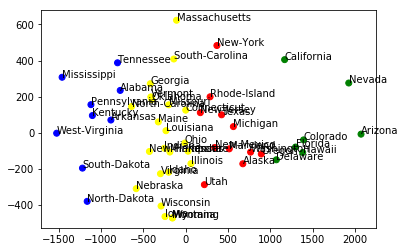

In [56]:
colors = ['red', 'blue', 'green', 'yellow']
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap=col.ListedColormap(colors))
for label,x,y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.show()